___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#### *ii. Load Dataset*

In [2]:
df = pd.read_csv('treetypes.csv')

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [5]:
dummy_col = df.loc[:,'Wilderness_Area_1':'Soil_Type_40']

In [6]:
num_col = df.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

In [7]:
num_col.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.000,2748.505,418.301,1859.000,2375.000,2753.000,3108.000,3857.000
Aspect,250000.000,156.212,109.653,0.000,65.000,125.000,260.000,360.000
Slope,250000.000,16.331,8.317,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,250000.000,228.094,209.630,0.000,66.000,180.000,330.000,1390.000
Vertical_Distance_To_Hydrology,250000.000,50.898,61.007,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,250000.000,1719.967,1330.818,0.000,756.000,1318.000,2294.000,7112.000
Hillshade_9am,250000.000,212.370,30.655,0.000,195.000,220.000,235.000,254.000
Hillshade_Noon,250000.000,218.511,22.681,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,250000.000,134.503,46.034,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,250000.000,1521.757,1107.378,0.000,734.000,1273.000,1998.000,7150.000


In [8]:
for feature in df.columns:
    print(feature, df[feature].nunique())

Elevation 1983
Aspect 361
Slope 59
Horizontal_Distance_To_Hydrology 1294
Vertical_Distance_To_Hydrology 578
Horizontal_Distance_To_Roadways 6501
Hillshade_9am 207
Hillshade_Noon 165
Hillshade_3pm 253
Horizontal_Distance_To_Fire_Points 6487
Wilderness_Area_1 2
Wilderness_Area_2 2
Wilderness_Area_3 2
Wilderness_Area_4 2
Soil_Type_1 2
Soil_Type_2 2
Soil_Type_3 2
Soil_Type_4 2
Soil_Type_5 2
Soil_Type_6 2
Soil_Type_7 2
Soil_Type_8 2
Soil_Type_9 2
Soil_Type_10 2
Soil_Type_11 2
Soil_Type_12 2
Soil_Type_13 2
Soil_Type_14 2
Soil_Type_15 2
Soil_Type_16 2
Soil_Type_17 2
Soil_Type_18 2
Soil_Type_19 2
Soil_Type_20 2
Soil_Type_21 2
Soil_Type_22 2
Soil_Type_23 2
Soil_Type_24 2
Soil_Type_25 2
Soil_Type_26 2
Soil_Type_27 2
Soil_Type_28 2
Soil_Type_29 2
Soil_Type_30 2
Soil_Type_31 2
Soil_Type_32 2
Soil_Type_33 2
Soil_Type_34 2
Soil_Type_35 2
Soil_Type_36 2
Soil_Type_37 2
Soil_Type_38 2
Soil_Type_39 2
Soil_Type_40 2
Cover_Type 7


In [9]:
df.duplicated().sum()

2521

In [10]:
df = df.drop_duplicates()

In [11]:
for col in dummy_col:
    count=dummy_col[col].value_counts()
    print(col,count)

Wilderness_Area_1 0    190425
1     59575
Name: Wilderness_Area_1, dtype: int64
Wilderness_Area_2 0    241660
1      8340
Name: Wilderness_Area_2, dtype: int64
Wilderness_Area_3 0    145544
1    104456
Name: Wilderness_Area_3, dtype: int64
Wilderness_Area_4 0    172827
1     77173
Name: Wilderness_Area_4, dtype: int64
Soil_Type_1 0    245414
1      4586
Name: Soil_Type_1, dtype: int64
Soil_Type_2 0    241034
1      8966
Name: Soil_Type_2, dtype: int64
Soil_Type_3 0    235406
1     14594
Name: Soil_Type_3, dtype: int64
Soil_Type_4 0    238270
1     11730
Name: Soil_Type_4, dtype: int64
Soil_Type_5 0    247741
1      2259
Name: Soil_Type_5, dtype: int64
Soil_Type_6 0    240651
1      9349
Name: Soil_Type_6, dtype: int64
Soil_Type_7 0    249985
1        15
Name: Soil_Type_7, dtype: int64
Soil_Type_8 0    249977
1        23
Name: Soil_Type_8, dtype: int64
Soil_Type_9 0    249847
1       153
Name: Soil_Type_9, dtype: int64
Soil_Type_10 0    218467
1     31533
Name: Soil_Type_10, dtype: int6

Some of the Soiltype feature have very few counts.I will drop them.

In [12]:
drop_soil = []
for i in dummy_col:
    count=dummy_col[i].value_counts()[1] #considering all one's among 1 and 0's in each soil type
    if count < 1000:
        print(i,count)
        drop_soil.append(i)

Soil_Type_7 15
Soil_Type_8 23
Soil_Type_9 153
Soil_Type_15 1
Soil_Type_18 879
Soil_Type_19 717
Soil_Type_21 157
Soil_Type_25 58
Soil_Type_26 797
Soil_Type_27 211
Soil_Type_28 150
Soil_Type_34 375
Soil_Type_36 99
Soil_Type_37 463


In [13]:
df.drop(drop_soil,axis=1,inplace=True)

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [14]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_10                          0
Soil_Type_11                          0
Soil_Type_12                          0
Soil_Type_13                          0
Soil_Type_14                          0


great job done in data collection!

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

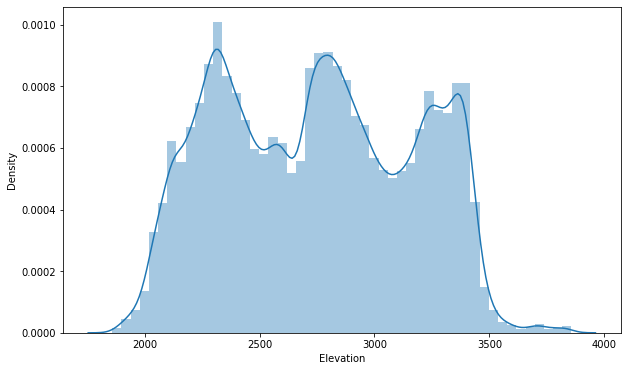

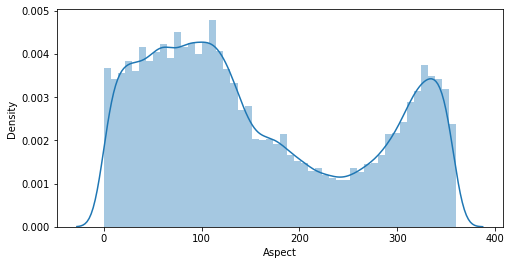

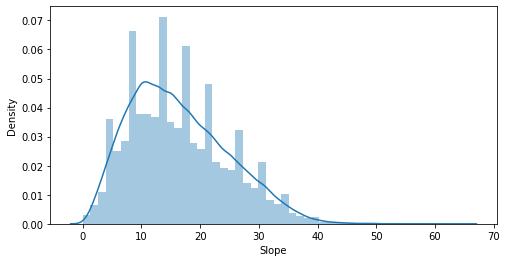

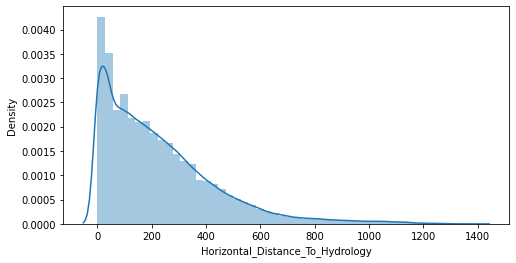

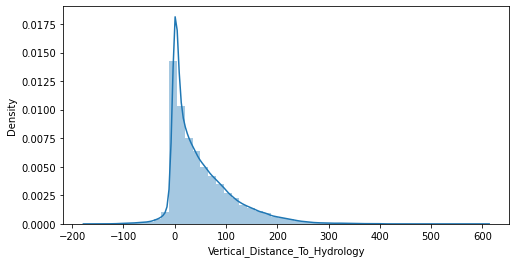

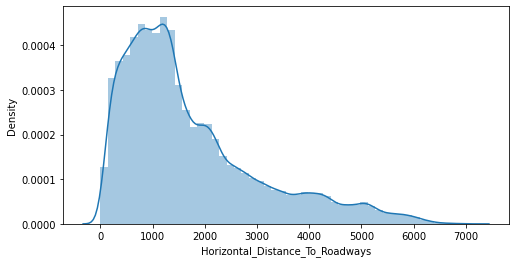

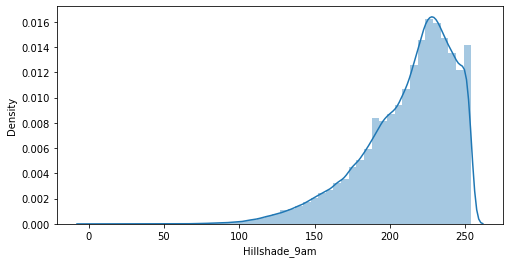

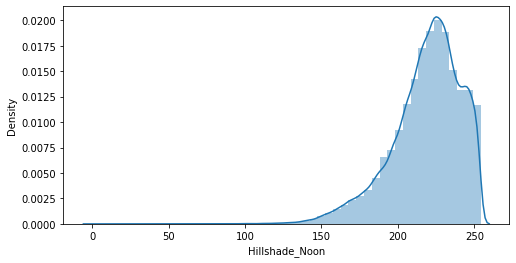

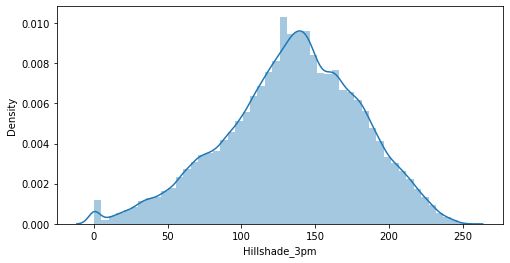

<Figure size 576x288 with 0 Axes>

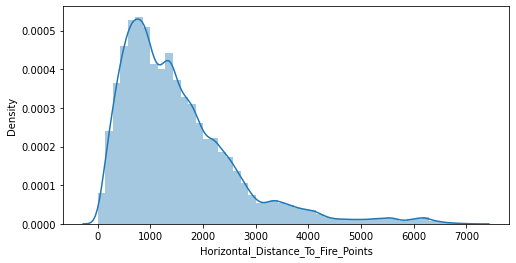

In [15]:
for i, col in enumerate(num_col.columns):
    plt.figure(figsize=(8,4))
    plt.figure(i)
    sns.distplot(num_col[col])

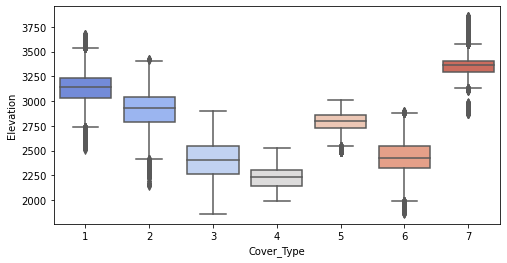

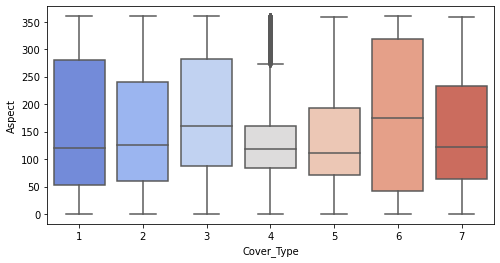

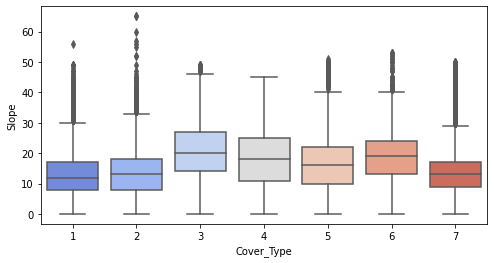

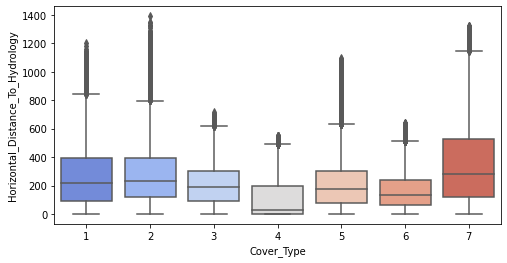

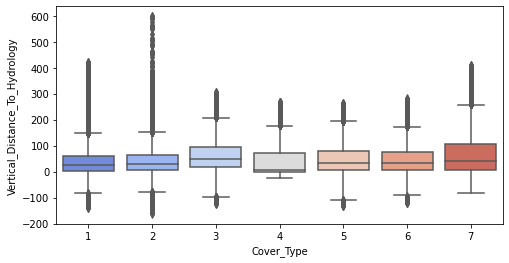

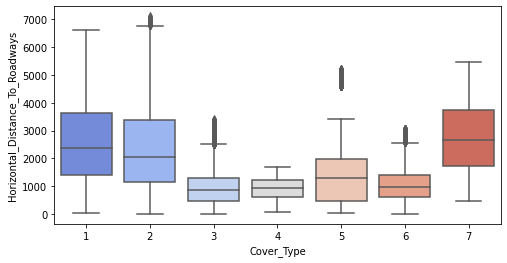

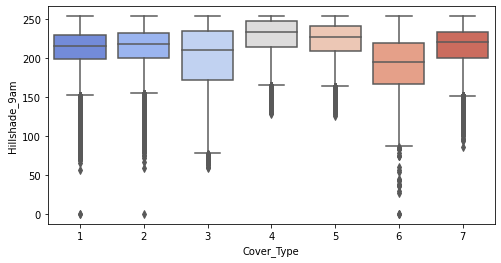

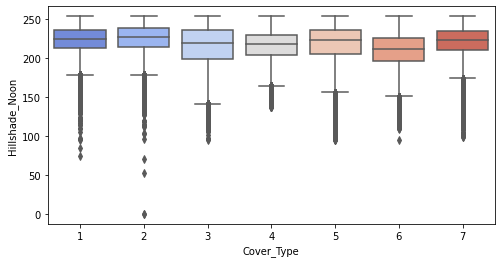

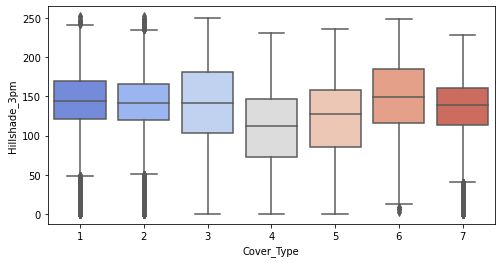

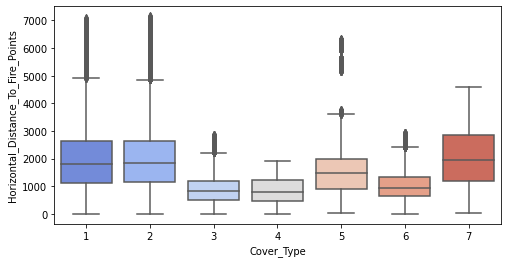

In [16]:
df['Cover_Type']=df['Cover_Type'].astype('category')

for i, col in enumerate(num_col.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=df['Cover_Type'], y=col, data=df, palette="coolwarm")


### Now, let's take a closer look at correlation of continuous columns.

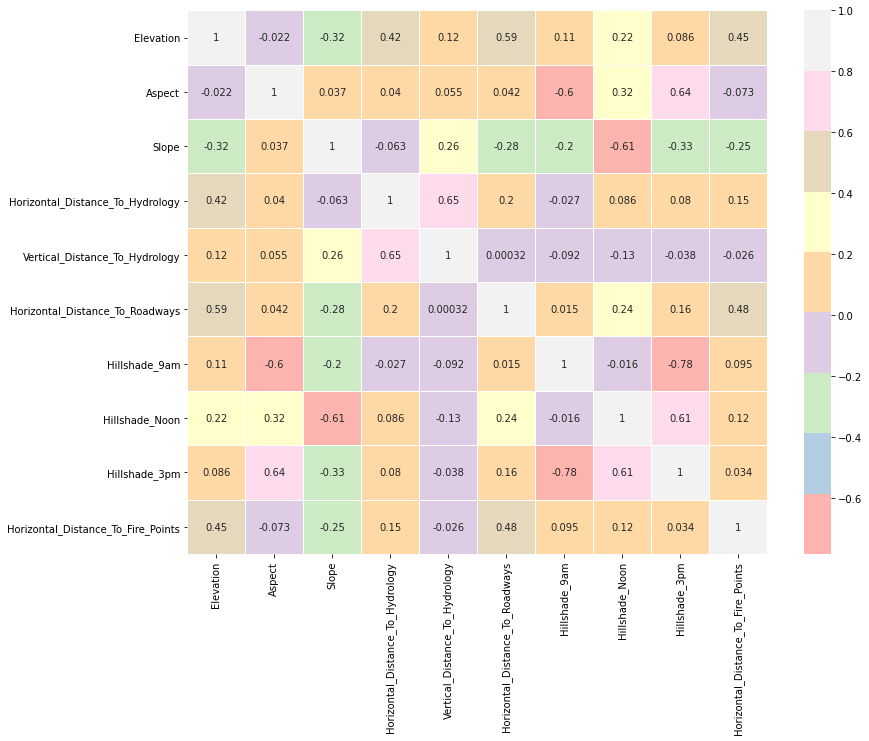

In [17]:
plt.figure(figsize=(13,10))
sns.heatmap(num_col.corr(),cmap='Pastel1',linecolor='white',linewidths=1,annot=True);

Hillshade_3pm and Hillshade_9am highly correlated. I will drop Hillshade_3pm.

In [18]:
df.drop('Hillshade_3pm', axis=1,inplace=True)
num_col.drop('Hillshade_3pm', axis=1,inplace=True)

In [19]:
df.shape

(247479, 40)

In [20]:
df.Cover_Type.value_counts()

1    35835
2    35780
5    35514
7    35481
6    35430
3    35273
4    34166
Name: Cover_Type, dtype: int64

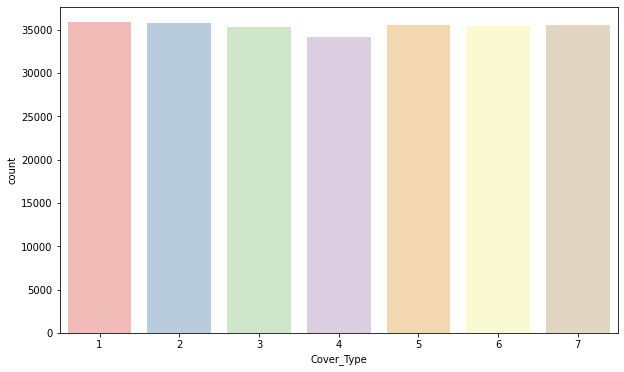

In [21]:
sns.countplot(x='Cover_Type',data=df,palette='Pastel1');

Super! Class balance seems very good!

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

In [23]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [24]:
X = df.drop('Cover_Type',axis=1)
y = df.Cover_Type

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [26]:
from sklearn.pipeline import Pipeline
operations_svm = [("scaler", MinMaxScaler()), ("SVC", LinearSVC(random_state=101))]
pipe_svm_model = Pipeline(steps=operations_svm)

In [27]:
pipe_svm_model.fit(X_train, y_train) 
eval_metric(pipe_svm_model, X_train, y_train, X_test, y_test) 

Test_Set
[[6783 1666   11    0  745  104 1476]
 [2562 4978  276    6 2266  481  124]
 [   0   24 5293 1426  678 3175    0]
 [   0    0  573 9274    0  472    0]
 [ 393 1441  822    0 7543  565    0]
 [   1  374 1726 1211 1255 5964    0]
 [ 998   10   42    0   68    0 9438]]
              precision    recall  f1-score   support

           1       0.63      0.63      0.63     10785
           2       0.59      0.47      0.52     10693
           3       0.61      0.50      0.55     10596
           4       0.78      0.90      0.83     10319
           5       0.60      0.70      0.65     10764
           6       0.55      0.57      0.56     10531
           7       0.86      0.89      0.87     10556

    accuracy                           0.66     74244
   macro avg       0.66      0.66      0.66     74244
weighted avg       0.66      0.66      0.66     74244


Train_Set
[[15899  3886    22     0  1640   283  3320]
 [ 6081 11740   637    12  5211  1129   277]
 [    0    82 12337  3462 

In [28]:
model = Pipeline(steps=operations_svm)

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
scoring = {"f1" : make_scorer(f1_score, average='micro'),
           "precision" : make_scorer(precision_score, average='micro'),
           "recall" : make_scorer(recall_score, average='micro')}


scores = cross_validate(pipe_svm_model, X_train.values, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_f1          0.666
test_precision   0.666
test_recall      0.666
dtype: float64

### Grid Search

In [29]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1]         
              }

In [30]:
operations = [("scaler", MinMaxScaler()), ("SVC", LinearSVC(random_state =101))]
model = Pipeline(steps=operations)

linearSVC_grid = GridSearchCV(model, param_grid, scoring= 'recall', n_jobs=-1) 

In [31]:
linearSVC_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVC', LinearSVC(random_state=101))]),
             n_jobs=-1, param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1]},
             scoring='recall')

In [32]:
linearSVC_grid.best_params_

{'SVC__C': 0.001}

In [33]:
eval_metric(linearSVC_grid, X_train, y_train, X_test, y_test) 

Test_Set
[[6319 2247    9    0  784   95 1331]
 [2477 5241  232   16 2128  436  163]
 [   0   29 4752 1832  741 3241    1]
 [   0    0  822 8993    0  504    0]
 [ 682 1632  915    7 7116  374   38]
 [  44  403 1646 1461 1472 5505    0]
 [1835   75   42    0   95    0 8509]]
              precision    recall  f1-score   support

           1       0.56      0.59      0.57     10785
           2       0.54      0.49      0.52     10693
           3       0.56      0.45      0.50     10596
           4       0.73      0.87      0.79     10319
           5       0.58      0.66      0.62     10764
           6       0.54      0.52      0.53     10531
           7       0.85      0.81      0.83     10556

    accuracy                           0.63     74244
   macro avg       0.62      0.63      0.62     74244
weighted avg       0.62      0.63      0.62     74244


Train_Set
[[14721  5285    21     0  1739   244  3040]
 [ 5853 12334   536    45  4904  1050   365]
 [    0    95 11071  4332 

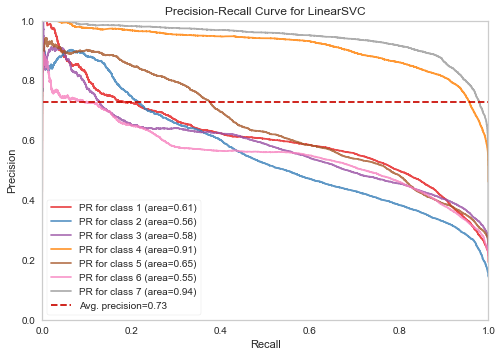

In [34]:
from yellowbrick.classifier import PrecisionRecallCurve
operations = [("scaler", MinMaxScaler()), ("svc", LinearSVC(C=0.1,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= [1,2,3,4,5,6,7],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
DT_model = DecisionTreeClassifier(random_state=101)

In [37]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [38]:
y_pred = DT_model.predict(X_test)

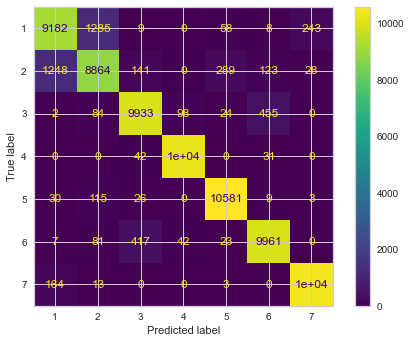

In [39]:
plot_confusion_matrix(DT_model,X_test,y_test)

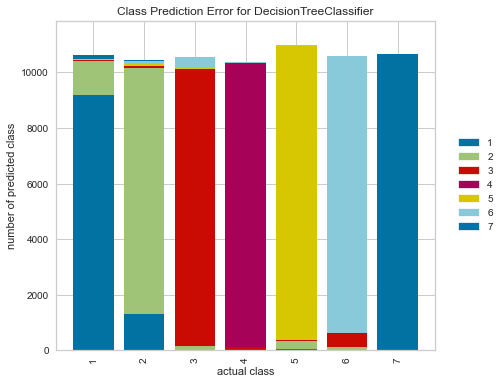

In [40]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(DT_model) #class bazinda yaptigimiz hatalari gösteriyor.

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

In [41]:
eval_metric(DT_model, X_train, y_train, X_test, y_test) 

Test_Set
[[ 9182  1285     9     0    58     8   243]
 [ 1248  8864   141     0   289   123    28]
 [    2    84  9933    98    24   455     0]
 [    0     0    42 10246     0    31     0]
 [   30   115    26     0 10581     9     3]
 [    7    81   417    42    23  9961     0]
 [  164    13     0     0     3     0 10376]]
              precision    recall  f1-score   support

           1       0.86      0.85      0.86     10785
           2       0.85      0.83      0.84     10693
           3       0.94      0.94      0.94     10596
           4       0.99      0.99      0.99     10319
           5       0.96      0.98      0.97     10764
           6       0.94      0.95      0.94     10531
           7       0.97      0.98      0.98     10556

    accuracy                           0.93     74244
   macro avg       0.93      0.93      0.93     74244
weighted avg       0.93      0.93      0.93     74244


Train_Set
[[25050     0     0     0     0     0     0]
 [    0 25087     0   

### Cross Validate

In [42]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.927
test_precision_micro   0.927
test_recall_micro      0.927
test_f1_micro          0.927
dtype: float64

### Grid Search

In [43]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", 2, 3,4],  
              "max_depth": [None, 2,],                          
              "min_samples_leaf": [1, 2, 3],
              "min_samples_split": [2, 3]}

In [44]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='recall',  
                          cv=10,
                          n_jobs = -1)

In [45]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2],
                         'max_features': [None, 'auto', 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'splitter': ['best', 'random']},
             scoring='recall')

In [46]:
grid_model.best_score_

nan

In [47]:
grid_model.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [48]:
eval_metric(grid_model,X_train,y_train,X_test,y_test)

Test_Set
[[ 9182  1285     9     0    58     8   243]
 [ 1248  8864   141     0   289   123    28]
 [    2    84  9933    98    24   455     0]
 [    0     0    42 10246     0    31     0]
 [   30   115    26     0 10581     9     3]
 [    7    81   417    42    23  9961     0]
 [  164    13     0     0     3     0 10376]]
              precision    recall  f1-score   support

           1       0.86      0.85      0.86     10785
           2       0.85      0.83      0.84     10693
           3       0.94      0.94      0.94     10596
           4       0.99      0.99      0.99     10319
           5       0.96      0.98      0.97     10764
           6       0.94      0.95      0.94     10531
           7       0.97      0.98      0.98     10556

    accuracy                           0.93     74244
   macro avg       0.93      0.93      0.93     74244
weighted avg       0.93      0.93      0.93     74244


Train_Set
[[25050     0     0     0     0     0     0]
 [    0 25087     0   

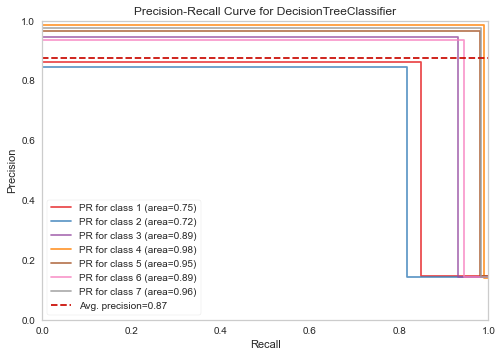

In [49]:
from yellowbrick.classifier import PrecisionRecallCurve
model = DecisionTreeClassifier(random_state=101)

visualizer = PrecisionRecallCurve(
    model,
    per_class=True, classes= [1,2,3,4,5,6,7],
    cmap="Set1"
)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [50]:
RF_model = RandomForestClassifier(random_state=101)
RF_model.fit(X_train,y_train)
eval_metric(RF_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 9736   832     8     0    42    10   157]
 [  734  9477   137     0   199   131    15]
 [    0     7 10231    95    16   247     0]
 [    0     0     8 10307     0     4     0]
 [    0    13    13     0 10734     4     0]
 [    0     4   114    45     6 10362     0]
 [   27     2     0     0     3     0 10524]]
              precision    recall  f1-score   support

           1       0.93      0.90      0.91     10785
           2       0.92      0.89      0.90     10693
           3       0.97      0.97      0.97     10596
           4       0.99      1.00      0.99     10319
           5       0.98      1.00      0.99     10764
           6       0.96      0.98      0.97     10531
           7       0.98      1.00      0.99     10556

    accuracy                           0.96     74244
   macro avg       0.96      0.96      0.96     74244
weighted avg       0.96      0.96      0.96     74244


Train_Set
[[25050     0     0     0     0     0     0]
 [    0 25087     0   

### Cross Validation

In [51]:
model = RandomForestClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.960
test_precision_micro   0.960
test_recall_micro      0.960
test_f1_micro          0.960
dtype: float64

### Grid Search

In [52]:
param_grid = {'n_estimators':[64,100],
             'max_features':[2, "auto"],
             'max_depth':[2, 'None']}

In [53]:
model = RandomForestClassifier(random_state=101)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "recall_micro", n_jobs = -1).fit(X_train, y_train)

In [54]:
rf_grid_model.best_params_

{'max_depth': 2, 'max_features': 2, 'n_estimators': 100}

In [55]:
rf_grid_model.best_estimator_

RandomForestClassifier(max_depth=2, max_features=2, random_state=101)

In [56]:
rf_grid_model.best_score_

0.6003463503333621

In [57]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[4698 2608    6   27  752  132 2562]
 [2327 4795  133  157 1769  628  884]
 [  18  149 3856 2585  276 3353  359]
 [   0    0  274 9836    0  209    0]
 [1485 1301  340  217 6241  367  813]
 [  58  311 1257 2532  264 6010   99]
 [ 684  435    0    1  130    1 9305]]
              precision    recall  f1-score   support

           1       0.51      0.44      0.47     10785
           2       0.50      0.45      0.47     10693
           3       0.66      0.36      0.47     10596
           4       0.64      0.95      0.77     10319
           5       0.66      0.58      0.62     10764
           6       0.56      0.57      0.57     10531
           7       0.66      0.88      0.76     10556

    accuracy                           0.60     74244
   macro avg       0.60      0.60      0.59     74244
weighted avg       0.60      0.60      0.59     74244


Train_Set
[[10960  6047     6    61  1648   277  6051]
 [ 5633 11323   316   331  3966  1405  2113]
 [   59   368  9113  5963 

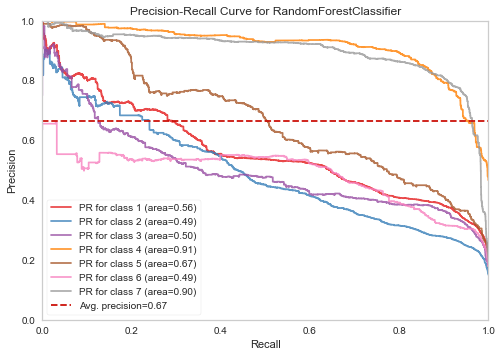

In [58]:
from yellowbrick.classifier import PrecisionRecallCurve
model = RandomForestClassifier(max_depth=2, max_features=2, n_estimators = 100, random_state=101)

visualizer = PrecisionRecallCurve(
    model,
    per_class=True, classes= [1,2,3,4,5,6,7],
    cmap="Set1"
)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [59]:
from sklearn.utils import class_weight  
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.98648133, 0.99392976, 0.98648133, ..., 0.99991342, 1.00287138,
       0.99392976])

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [61]:
xgb = XGBClassifier(random_state=101).fit(X_train, y_train,sample_weight=classes_weights)

In [62]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

Test_Set
[[    0     0     0     0     0     0     0     0]
 [ 9123  1195     7     0   115    14   331     0]
 [ 1464  8342   152     0   526   173    36     0]
 [    0    19  9487   130    61   899     0     0]
 [    0     0    21 10286     0    12     0     0]
 [    4    41    49     0 10640    30     0     0]
 [    0    27   310    45    32 10117     0     0]
 [   54     1     0     0     3     0 10498     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.12      0.11      0.12     10785
           2       0.02      0.01      0.01     10693
           3       0.01      0.01      0.01     10596
           4       0.00      0.00      0.00     10319
           5       0.00      0.00      0.00     10764
           6       0.00      0.00      0.00     10531
           7       0.00      0.00      0.00     10556

    accuracy                           0.02     74244
   macro avg       0.02      0.02      0

In [64]:
model = XGBClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = 'recall_micro', cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score   0.923
dtype: float64

### Grid Search

In [65]:
param_grid = {"n_estimators":[50, 100],'max_depth':[1,2], "learning_rate": [0.1, 0.2],
             "subsample":[0.8, 1], "colsample_bytree":[0.5,1]}

In [66]:
xgb_model = XGBClassifier(random_state=101)

In [68]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "recall_micro", n_jobs = -1).fit(X_train, y_train,sample_weight=classes_weights)

In [69]:
xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=101, reg_alpha=0, ...)

In [70]:
xgb_grid.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.2,
 'max_depth': 2,
 'n_estimators': 100,
 'subsample': 0.8}

In [71]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[   0    0    0    0    0    0    0    0]
 [7248 1569    8    0  526   46 1388    0]
 [2409 5397  212    0 2085  443  147    0]
 [   0    0 6995  795  354 2452    0    0]
 [   0    0  334 9849    0  136    0    0]
 [  23  346  345    0 9771  279    0    0]
 [   0   34 2169  361  346 7621    0    0]
 [ 618    0    0    0   28    0 9910    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.21      0.15      0.17     10785
           2       0.02      0.02      0.02     10693
           3       0.07      0.08      0.07     10596
           4       0.00      0.00      0.00     10319
           5       0.03      0.03      0.03     10764
           6       0.00      0.00      0.00     10531
           7       0.00      0.00      0.00     10556

    accuracy                           0.04     74244
   macro avg       0.04      0.03      0.04     74244
weighted avg       0.05      0.04      0.04     74

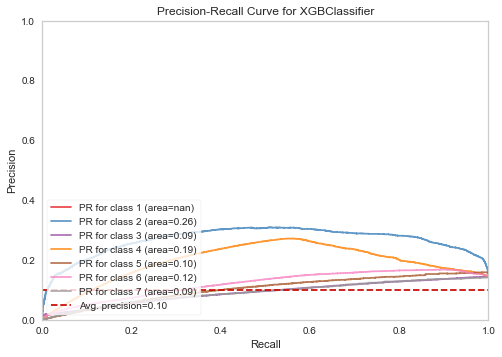

In [72]:
model = XGBClassifier(colsample_bytree= 1, max_depth=2, n_estimators=100,
              random_state=101, learning_rate = 0.2, subsample=0.8)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= [1,2,3,4,5,6,7],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___